In [61]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Continuous monotonic increasing function $\Lambda(H)$

In [20]:
def rhoH(value):
    rhoH=(-np.power(3,2*value)+np.power(2,2*value+2)-7)/(8-np.power(2,2*value+1))
    return rhoH

In [21]:
def lam0r(value):
    lam0r = (1/np.pi)*np.arccos(-value)
    return lam0r

In [22]:
def lamH(value):
    lamH=lam0r(rhoH(value))
    return lamH

In [30]:
H=np.linspace(0,0.9,20)
lam=lamH(H)  ## This is the lambda(H)

<function matplotlib.pyplot.show(close=None, block=None)>

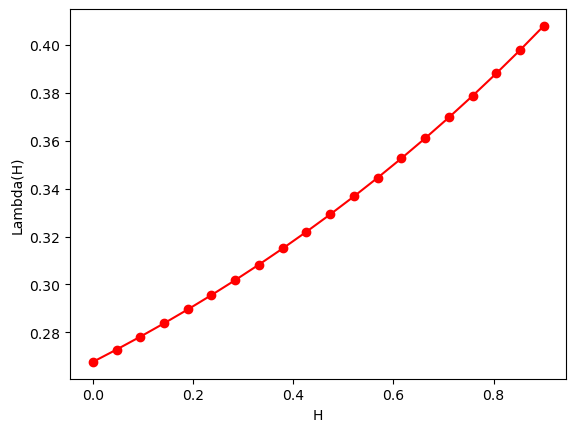

In [33]:
plt.plot(H,lam,'ro-')
plt.legend
plt.xlabel('H')
plt.ylabel('Lambda(H)')
plt.show

# 2. Increment Bernoulli Statistic $IBS_n(X)$

In [42]:
def psixy(val1,val2):
    if np.sign(val1) ==np.sign(val2):
      psixy=1
    else:
      psixy=0
    return psixy

    

In [46]:
x=[]
for i in range(6):
    x.append(i)


x

[0, 1, 2, 3, 4, 5]

In [53]:
def IBSN(val,n1):
    IBSN1=[]
    for i in range(n1-2):
        IBSN1.append(psixy(val[i],val[i+1]))
    IBSN=np.sum(IBSN1)/(n1-2)
    return IBSN

In [54]:
IBSN(x,6)

0.75

In [59]:
## Obtain the volatility index sequence x
xdiff2=np.diff(x,2)
xdiff2

array([0, 0, 0, 0])

# 3. Filtered derivative function $D(k,A)$

In [ ]:
A = 10  # sliding window size at the left/right of the index k


In [65]:
 n1=50
 randnums = np.random.randint(0,10,n1)
 randnums

array([4, 4, 9, 5, 8, 8, 1, 5, 6, 8, 9, 6, 3, 2, 7, 3, 9, 6, 1, 5, 1, 6,
       6, 9, 9, 7, 6, 8, 9, 3, 1, 8, 8, 4, 9, 5, 7, 1, 7, 2, 3, 3, 4, 6,
       6, 9, 7, 5, 4, 1])

In [85]:
xdiff2=np.diff(randnums,2)
np.size(xdiff2)

48

In [92]:
# A <= k <= n-A
def IBSA(val_X,val_k,val_A):
    IBSA1=[]
    for j in range(val_k,val_k+val_A):
        IBSA1.append(psixy(val_X[j],val_X[j+1]))
    IBSA=np.sum(IBSA1)/val_A
    return IBSA

In [93]:
IBSA(xdiff2,21,10)

0.5

In [95]:
A=10
n=48
IBex=[]
for i in range(1,n-A):
    IBex.append(IBSA(xdiff2,i,A))
IBex

[0.2,
 0.3,
 0.3,
 0.2,
 0.2,
 0.3,
 0.3,
 0.3,
 0.2,
 0.2,
 0.2,
 0.1,
 0.2,
 0.2,
 0.3,
 0.2,
 0.3,
 0.3,
 0.4,
 0.4,
 0.5,
 0.5,
 0.4,
 0.4,
 0.3,
 0.3,
 0.2,
 0.2,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1,
 0.1]

In [96]:
# the filtered derivative
np.size(IBex)

37

In [104]:
n

48

In [99]:
D=np.diff(IBex)
np.size(D)

36

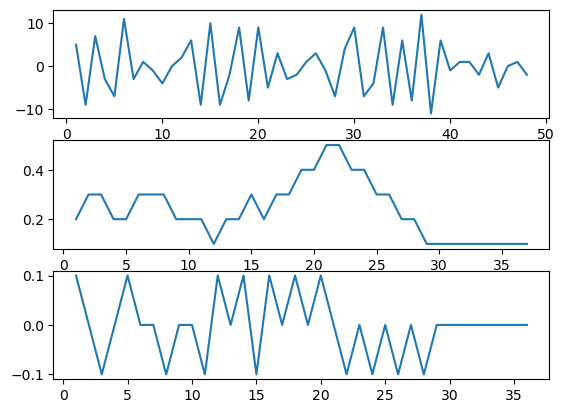

In [105]:
x1=np.arange(1,n+1) # n=48 n means the number of the 2 difference number
x2=np.arange(1,n-A)
x3=np.arange(1,n-A-1)

plt.subplot(3,1,1)
plt.plot(x1,xdiff2)

plt.subplot(3,1,2)
plt.plot(x2,IBex)

plt.subplot(3,1,3)
plt.plot(x3,D)

